# Color Identification in images 

## Importing libraries 

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans 
import cv2  
from collections import Counter 
from skimage.color import rgb2lab, deltaE_cie76
import os 

## Data Preprocessing

The type of this input is <class 'numpy.ndarray'>
Shape: (427, 640, 3)


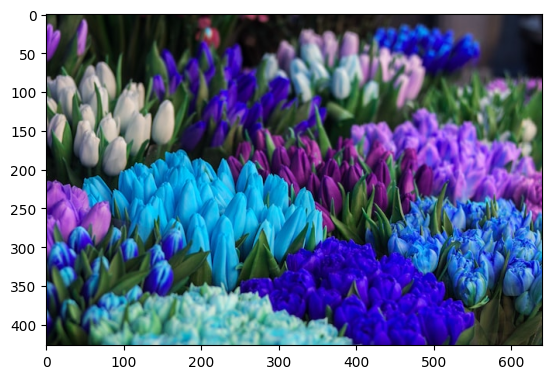

In [76]:
image = cv2.imread('images/sample_img.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

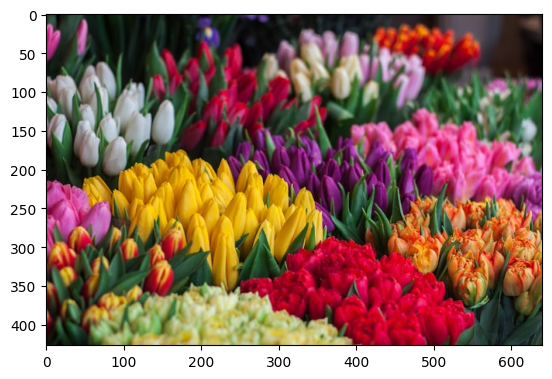

In [66]:
# Converting the image from BRG to RBG to view actual image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Identification of colors

In [67]:
# Converting RGB to HEX to use them as labels for our pie
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [68]:
# Function to import an image into python in RGB
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [69]:
def colors(image, numofcolors, chart):
#Resizing the image
    new_image = cv2.resize(image, (600,400), interpolation=cv2.INTER_AREA)
    new_image = new_image.reshape(new_image.shape[0]*new_image.shape[1], 3)

# Applying KMeans Clustering to the image
    clf = KMeans(n_clusters = numofcolors)
    labels = clf.fit_predict(new_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
 
    if chart:
        plt.figure(figsize = (8,6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[array([132.52910433, 129.39072689,  98.97866321]),
 array([115.06922323,  28.12919494,  49.40173421]),
 array([206.27569759,  87.57244217, 155.54704269]),
 array([210.95495956, 148.96488169,  32.99067921]),
 array([65.14738432, 83.5138661 , 57.83610655]),
 array([191.24986646,  18.55314765,  45.24269363]),
 array([191.82219037, 183.57701711, 161.47618245]),
 array([30.52346143, 31.5318989 , 23.0809922 ])]

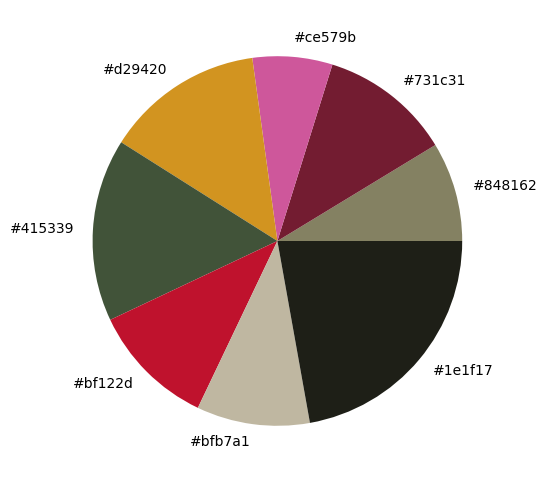

In [70]:
colors(get_image('sample_img.jpg'), 8, True)

## Testing 

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[array([117.25415717,  32.5786275 ,   4.72693509]),
 array([ 4.38064487, 66.96284199, 13.85034911]),
 array([196.50234192, 167.66419464,  95.36494926]),
 array([242.49291316, 152.70616591,  14.7322829 ]),
 array([ 8.93382088, 25.60219161,  4.98659649]),
 array([203.77361237,  75.67461328,   7.96615105]),
 array([53.04307142, 84.62879372, 14.39629915]),
 array([106.20243953, 126.18552914,  38.14443135])]

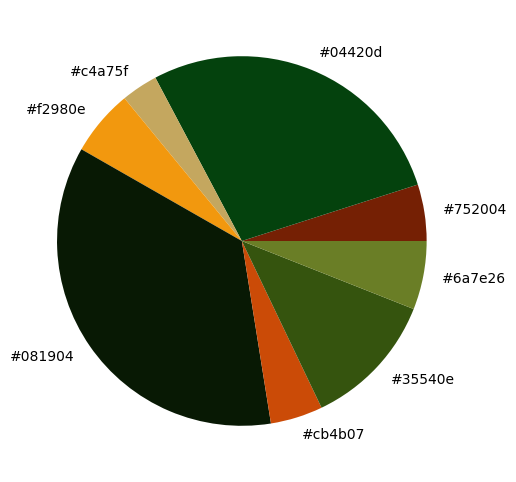

In [80]:
colors(get_image('images/test_img.jpg'), 8, True)